In [15]:
import numpy as np
from sldata import SessionData
import matplotlib.pyplot as plt
import sys

### Populate SessionData

In [16]:
mouse_id = "7012"
session_id = "m10"
experiment = "clickbait-motivate"

print("=== Loading SessionData Class ===")
print(f"Loading data for {mouse_id}_{session_id}...")

data = SessionData(
    mouse_id=mouse_id,
    session_id=session_id,
    experiment=experiment,
    base_path='D:/data/',
    min_spikes=50,
    verbose=True)

=== Loading SessionData Class ===
Loading data for 7012_m10...
Successfully loaded spike_times from D:\data\clickbait-motivate\kilosorted\7012\m10\spike_times.npy
Successfully loaded spike_templates from D:\data\clickbait-motivate\kilosorted\7012\m10\spike_templates.npy
Successfully loaded templates from D:\data\clickbait-motivate\kilosorted\7012\m10\templates.npy
Successfully loaded sniff from D:\data\clickbait-motivate\preprocessed\7012\m10\sniff.npy
Loaded data: ['spike_times', 'spike_templates', 'templates', 'sniff']
Successfully loaded events from D:\data\clickbait-motivate\bonsai\7012\m10\events.csv
Video properties: 888x1968, 30.0 FPS, 81815 frames
Loaded cluster labels: 21 good, 23 mua, 14 noise
Excluded 14 noise clusters
Found 22863 peaks in sniff signal
Peak times range: 2.7 - 91559.2 ms
Loaded 43 clusters for 7012_m10
Loaded sniff data: 2746860 samples
Found 22863 sniff events


### Sniff Signal

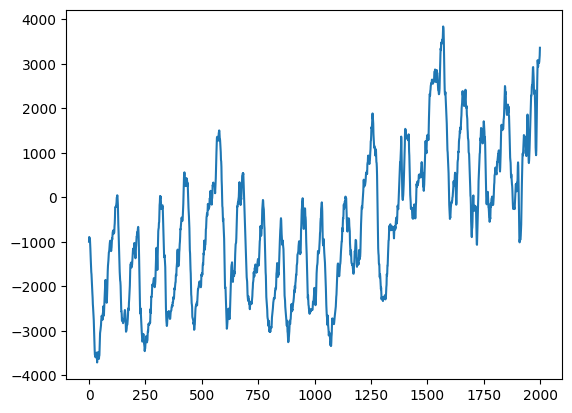

In [17]:
start = 16750
end = 18750
sniffs = np.array([round(x) for x in data.sniff_times if start < x < end])


plt.plot(data.sniff[start:end])
#plt.scatter(sniffs-start, data.sniff[sniffs])

Created population matrix: 43 neurons x 250 time bins
Time range: 1200000.0 - 1250000.0 ms
Bin size: 200 ms
Applied z-scoring to neurons


Text(0.5, 0, '200ms bins')

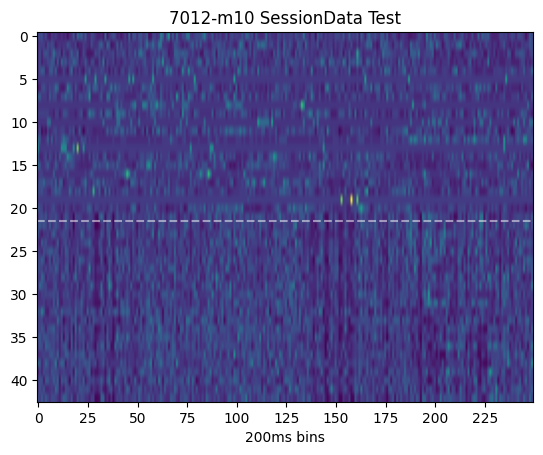

In [18]:
### Population Raster
start_time=1000*1200
end_time=start_time+50000 
bin_size_ms=200

pop_matrix, time_bins, included_clusters = data.create_population_raster(
    start_time=start_time,
    end_time=end_time, 
    bin_size_ms=bin_size_ms,
    zscore_neurons=True,
    cluster_ids=None
)

from matplotlib.ticker import MaxNLocator
# Check when regions switch
for ii in range(len(data.clusters)):
    if data.clusters[ii]['best_channel'] > 16:
        region_line = ii
        break

plt.imshow(pop_matrix, aspect='auto')
plt.xticks(range(pop_matrix.shape[1]))  # One tick per column
plt.yticks(range(pop_matrix.shape[0]))  # One tick per row
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.axhline(region_line-.5, c='w', linestyle='dashed', alpha=.5)
plt.title(f"{mouse_id}-{session_id} SessionData Test")
plt.xlabel(f"{bin_size_ms}ms bins")

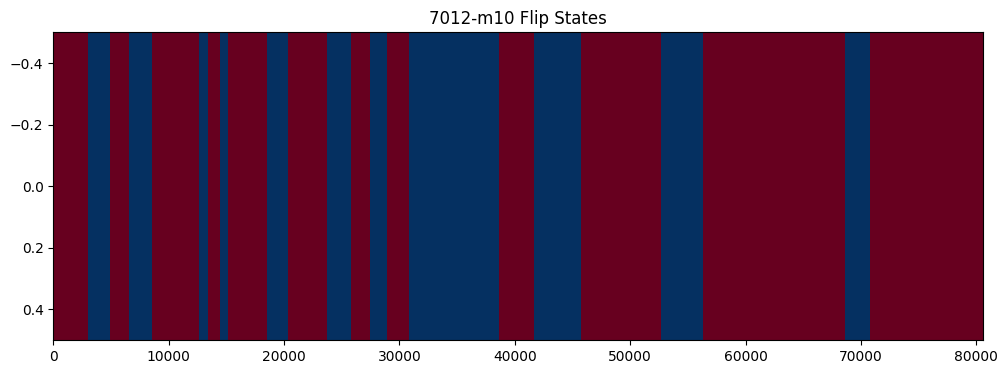

In [19]:
flip_state = np.expand_dims(data.events['flip_state'], axis=0)
#flip_state_2d = np.tile(flip_state, (1, 1))  
plt.figure(figsize=(12, 4))
plt.imshow(flip_state, cmap='RdBu', aspect='auto', interpolation='nearest')
plt.title(f"{mouse_id}-{session_id} Flip States")
plt.show()

In [22]:
data.clusters[15]

{'cluster_id': 21,
 'label': 'mua',
 'best_channel': np.int64(10),
 'spike_times': array([9.96333333e+01, 1.04333333e+02, 1.21866667e+02, ...,
        2.74682157e+06, 2.74684307e+06, 2.74684853e+06], shape=(137662,)),
 'waveform_template': array([ 0.17012891,  0.18126693,  0.18853766,  0.20036173,  0.22050375,
         0.2407108 ,  0.24688327,  0.23723742,  0.24010909,  0.2919942 ,
         0.3769371 ,  0.41851264,  0.39811924,  0.4955518 ,  0.9665611 ,
         1.7383391 ,  2.061449  ,  1.0146013 , -1.4179429 , -4.178816  ,
        -5.3800435 , -4.2876854 , -1.9847554 , -0.12537576,  0.6644741 ,
         0.6157955 ,  0.39216512,  0.340973  ,  0.40223193,  0.4252303 ,
         0.3789608 ,  0.31973922,  0.29312122,  0.29391217,  0.29061547,
         0.27179527,  0.24803802,  0.22921693,  0.21789232,  0.21010716,
         0.20402503,  0.19645499,  0.18614672,  0.17358394,  0.16195399,
         0.15310098,  0.14848635,  0.14403412,  0.13425218,  0.12694061,
         0.11711969,  0.1053535

Created sniff-locked raster for cluster 11: (22863, 1001) (sniffs x timesteps)


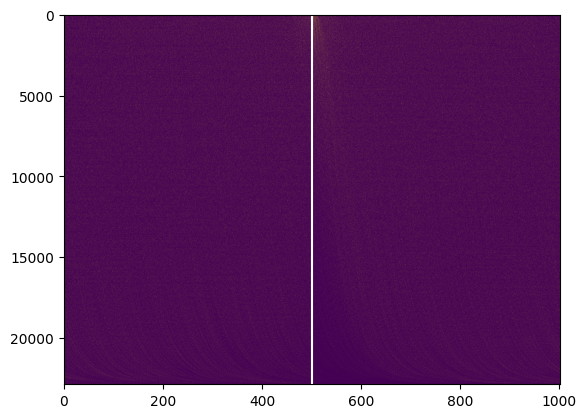

In [24]:
sniff_locked = data.create_sniff_locked_raster(cluster_idx=11, window_ms=500)
plt.imshow(sniff_locked, aspect='auto')
plt.axvline(500, color='w')

Created scatter data: 1150880 spikes across 1 clusters and 22863 sniff events


D:\code\sl-data\src\sldata\SessionData.py:1626: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0)


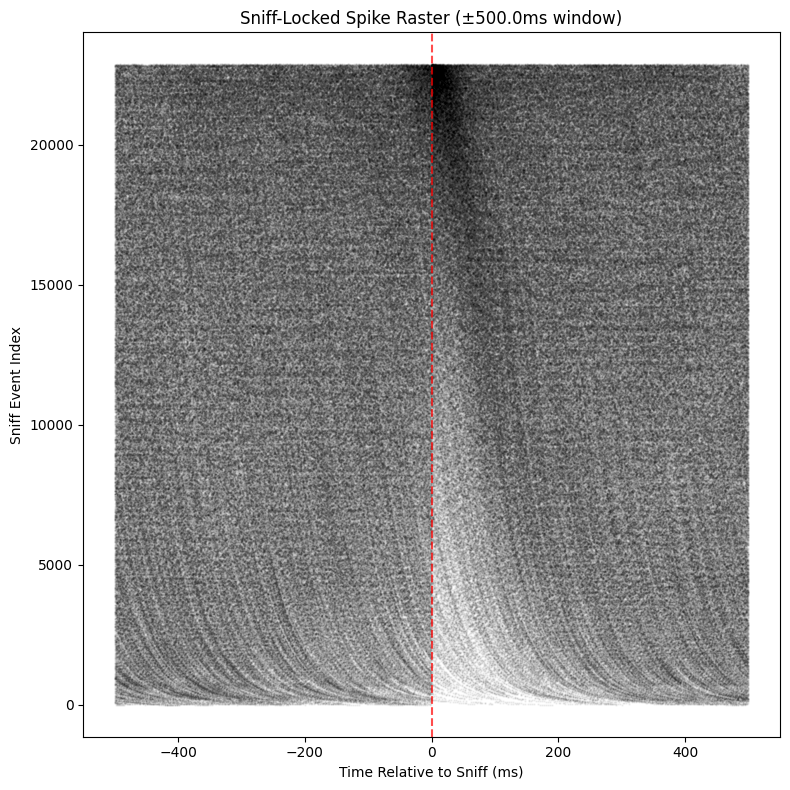

(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'Sniff-Locked Spike Raster (±500.0ms window)'}, xlabel='Time Relative to Sniff (ms)', ylabel='Sniff Event Index'>)

In [25]:
data.plot_sniff_locked_scatter(cluster_indices=[11])

### Cluster Attribute

In [ ]:
data.clusters[4]

{'cluster_id': 14,
 'label': 'mua',
 'best_channel': np.int64(17),
 'spike_times': array([ 541909.13333333,  546837.06666667,  564817.6       , ...,
        2774628.83333333, 2774629.13333333, 2774630.93333333],
       shape=(40033,)),
 'waveform_template': array([-0.7142088 , -0.76408696, -0.8078179 , -0.8491921 , -0.88444096,
        -0.8979131 , -0.8974598 , -0.8884776 , -0.8604946 , -0.80483764,
        -0.719041  , -0.6360276 , -0.54966563, -0.37178218,  0.04513523,
         0.82410467,  1.8113531 ,  2.6627889 ,  3.2499228 ,  3.4167416 ,
         3.3680387 ,  3.2418103 ,  3.0264328 ,  2.5596857 ,  1.9244924 ,
         1.2813247 ,  0.74344254,  0.34143695,  0.03705918, -0.19473593,
        -0.35447702, -0.4435201 , -0.47885913, -0.48552203, -0.49349034,
        -0.50273955, -0.51783645, -0.54725623, -0.59002817, -0.63350415,
        -0.6890773 , -0.74518   , -0.8033606 , -0.86337304, -0.91750175,
        -0.949952  , -0.9544742 , -0.93503946, -0.9088124 , -0.88295174,
        -0.85

: 

### Cluster Filtering

In [ ]:
hc_data = data.filter_clusters('best_channel <= 16')
ob_data = data.filter_clusters('best_channel > 16')

Filtered from 25 to 16 clusters using: best_channel <= 16
Filtered from 25 to 9 clusters using: best_channel > 16


: 

### Bonsai Events

In [ ]:
import pandas as pd

sum(pd.isna(data.events['target_cell']))

42357

: 

In [ ]:
test = pd.DataFrame()
test['reward_state'] = (pd.isna(data.events['target_cell']) & 
                                (data.events['iti'] == False))

len(test[test['reward_state'] == True])

37466

: 

In [ ]:
print(len(data.events[data.events['reward_state'] == False]))
print(len(data.events[data.events['drinking'] == True]))

49549
6093


: 

### Event Filtering

In [ ]:
flip_state_0 = data.filter_events('flip_state == False')
flip_state_1 = data.filter_events('flip_state == True')

Filtered spikes with condition 'flip_state == False': 291629/749301 spikes retained
Filtered spikes with condition 'flip_state == True': 453626/749301 spikes retained


: 

In [ ]:
# Do we want to retain original events df or filter it?
print(len(flip_state_0.events))
print(len(flip_state_1.events))

79488
79488


: 

In [ ]:
flip_1_df = data.events[data.events['flip_state'] == True] 
flip_0_df = data.events[data.events['flip_state'] == False] 

: 

In [ ]:
print(len(flip_1_df))
print(len(flip_0_df))
print(np.median(flip_0_df['bonsai_centroid_y']))
print(np.median(flip_1_df['bonsai_centroid_y']))


48092
31396


KeyError: 'centroid_y'

: 

In [ ]:
hc_data.events

,trial_number,timestamp,poke_left,poke_right,centroid_x,centroid_y,target_cell,iti,water_left,water_right,reward_state,click,flip_state,speed,direction,drinking,timestamp_ms
0,0,2025-06-25 15:14:23.264371200,False,False,672,303,16.0,False,True,False,False,False,False,0.000000,0.000000,False,8259
1,0,2025-06-25 15:14:23.298073600,False,False,679,291,16.0,False,True,False,False,False,False,13.892444,1.570689,False,8292
2,0,2025-06-25 15:14:23.327820800,False,False,682,279,16.0,False,True,False,False,False,False,12.369317,1.570751,False,8325
3,0,2025-06-25 15:14:23.348633600,False,False,675,275,16.0,False,True,False,False,False,False,8.062258,0.785421,False,8359
4,0,2025-06-25 15:14:23.370880000,False,False,672,275,16.0,False,True,False,False,False,False,3.000000,0.000000,False,8392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78904,38,2025-06-25 15:58:13.646528000,False,False,484,1657,40.0,False,False,False,False,False,True,0.000000,0.000000,False,2638384
78905,38,2025-06-25 15:58:13.681881600,False,False,484,1658,40.0,False,False,False,False,False,True,1.000000,1.570796,False,2638417
78906,38,2025-06-25 15:58:13.720460800,False,False,483,1658,40.0,False,False,False,False,False,True,1.000000,0.000000,False,2638451
78907,38,2025-06-25 15:58:13.748121600,False,False,483,1658,40.0,False,False,False,False,False,True,0.000000,0.000000,False,2638484


: 

In [ ]:
flip_t, flip_f = data.filter_events('flip_state == True', return_false_condition=True)

Filtered spikes with condition 'flip_state == True': 409563/874871 spikes retained
False condition spikes: 457946/874871 spikes


: 

### Alignment Inspection

In [ ]:
# from scipy.signal import decimate

# reward_path = f"S:/{experiment}/preprocessed/{mouse_id}/{session_id}/reward.npy"
# reward_raw = np.load(reward_path)
# reward_1khz = decimate(reward_raw, 30, ftype='iir', zero_phase=True)

: 

In [ ]:
# # Covert voltages to bool
# start = data.events['timestamp_ms'][0]
# reward_bool = np.zeros_like(reward_1khz)
# reward_idx = np.where(reward_1khz > 0)
# reward_bool[reward_idx] = 1
# reward_bool[:start+25000] = 0  # Clean up initial reward noise (find a clean solution for this)
# reward_transition = np.where(np.diff(reward_bool) == 1)[0]
# reward_transition[0] # First reward state transition

: 

In [ ]:
# # Preview reward state boolean
# plt.plot(reward_bool[:1000*250])
# plt.axvline(data.events['timestamp_ms'][0], color='r', linestyle='--')
# plt.axvline(reward_transition[0], color='g', linestyle='--')
# plt.title('Start of Video and First Reward')
# plt.show()

: 

In [ ]:
# # Pick a transition to check
# reward_state_transition = reward_transition[-1]
# print(reward_state_transition)

: 

In [ ]:
# # Check for reward state transition in events dataframe
# data.events[data.events['timestamp_ms'].between(reward_state_transition-120, reward_state_transition+120)]

: 